# Preclass 02, linearization
- Match single time series to phase portrait (simple case)
- Identify stability from graph of dx/dt vs x
- Check understanding of single-valued dx/dt for a solution curve (f(x) is a unique function of x).

({'A_no_eq_right': 'PC02_phase_A_no_eq_right_single-S26.png',
  'B_no_eq_left': 'PC02_phase_B_no_eq_left_single-S26.png',
  'C_one_eq_stable': 'PC02_phase_C_one_eq_stable-S26.png',
  'D_one_eq_unstablelow': 'PC02_phase_D_one_eq_unstable_low-S26.png'},
 'PC02_phase_options-S26.png')

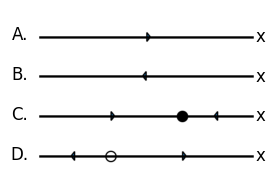

In [ ]:
# Make phase portraits for matching


import numpy as np
import matplotlib.pyplot as plt

def phase_line_one_eq_single_arrow(path, stable=True, xstar=0.0, xlim=(-3,3), figsize=(3,0.5)):
    plt.figure(figsize=figsize)
    plt.plot([xlim[0], xlim[1]],[0,0],'k', linewidth=1.8)

    if stable:
        plt.plot(xstar, [0], marker="o", markersize=8,
                 markerfacecolor="black", markeredgecolor='black')
        # one arrow on each side, pointing toward equilibrium
        plt.arrow((xlim[0]+xstar)/2, 0, 0.01, 0,
                  head_width=0.05, head_length=0.1)
        plt.arrow((xlim[1]+xstar)/2, 0, -0.01, 0,
                  head_width=0.05, head_length=0.1)
    else:
        plt.plot(xstar, [0], marker="o", markersize=8,
                 markerfacecolor="none", markeredgecolor='black')
        # one arrow on each side, pointing away from equilibrium
        plt.arrow((xlim[0]+xstar)/2, 0, -0.01, 0,
                  head_width=0.05, head_length=0.1)
        plt.arrow((xlim[1]+xstar)/2, 0, 0.01, 0,
                  head_width=0.05, head_length=0.1)

    plt.ylim(-0.1, 0.1)
    plt.xlim(*xlim)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    ax.set_xticks([])
    ax.set_yticks([])
    # plt.xlabel('x') # this places it in the wrong spot.
    plt.savefig(path, bbox_inches='tight', dpi=200)
    plt.close()


def phase_line_no_eq_single_arrow(path, direction="right", xlim=(-3,3), figsize=(3,0.5)):
    plt.figure(figsize=figsize)
    plt.plot([xlim[0], xlim[1]],[0,0],'k', linewidth=1.8)

    # single arrow indicating global flow direction
    if direction == "right":
        plt.arrow(0, 0, 0.01, 0, head_width=0.05, head_length=0.1)
    elif direction == "left":
        plt.arrow(0, 0, -0.01, 0, head_width=0.05, head_length=0.1)
    else:
        raise ValueError("direction must be 'right' or 'left'")

    plt.ylim(-0.1, 0.1)
    plt.xlim(*xlim)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(path, bbox_inches='tight', dpi=200)
    plt.close()


# Regenerate phase lines with one marker per region
paths = {
    "A_no_eq_right": "PC02_phase_A_no_eq_right_single-S26.png",
    "B_no_eq_left": "PC02_phase_B_no_eq_left_single-S26.png",
    "C_one_eq_stable": "PC02_phase_C_one_eq_stable-S26.png",
    "D_one_eq_unstablelow": "PC02_phase_D_one_eq_unstable_low-S26.png",
}

phase_line_no_eq_single_arrow(paths["A_no_eq_right"], direction="right")
phase_line_no_eq_single_arrow(paths["B_no_eq_left"], direction="left")
phase_line_one_eq_single_arrow(paths["C_one_eq_stable"], stable=True, xstar=1.0)
phase_line_one_eq_single_arrow(paths["D_one_eq_unstablelow"], stable=False, xstar=-1.0)

# Composite image
fig, axes = plt.subplots(4,1, figsize=(3, 5))
order = [("A", paths["A_no_eq_right"]), ("B", paths["B_no_eq_left"]),
         ("C", paths["C_one_eq_stable"]), ("D", paths["D_one_eq_unstablelow"])]
for ax, (label, p) in zip(axes.flatten(), order):
    img = plt.imread(p)
    ax.imshow(img)
    ax.axis('off')
    # Letter label: aligned with x-axis label, slightly to the left
    ax.text(-0.01, 0.7, f"{label}.", transform=ax.transAxes,
        ha="right", va="top", clip_on=False,fontsize=12)
    ax.text(1.01, 0.67, "x", transform=ax.transAxes,
        ha="right", va="top", clip_on=False,fontsize=12)
#    ax.text(0, -2.5, f"{label}",
#            ha="right", va="top", fontsize=11, clip_on=False)
    # ax.set_title(label, pad=2)
#fig.tight_layout()
fig.subplots_adjust(hspace=-0.85)
grid_path = "PC02_phase_options-S26.png"
fig.savefig(grid_path, dpi=300, bbox_inches='tight')
#plt.close(fig)

paths, grid_path


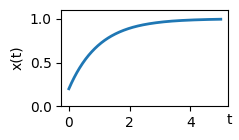

In [ ]:
# Make time series for matching

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE
def f(t, x):
    return 1 - x

# Time interval and initial condition
t_span = (0, 5)
x0 = [0.2]

# Solve the IVP
sol = solve_ivp(f, t_span, x0, dense_output=True)

# Evaluate solution on a fine time grid
t = np.linspace(t_span[0], t_span[1], 400)
x = sol.sol(t)[0]

# Plot the time series
plt.figure(figsize=(2.5,1.5))
plt.plot(t, x, linewidth=2)
#plt.axhline(1, linestyle="--", linewidth=1)
plt.ylim([0,1.1])
ax = plt.gca()
ax.set_xlabel("t", loc="right")
ax.xaxis.set_label_coords(1.02, -0.07)
plt.ylabel("x(t)")
plt.tight_layout()
time_series_path = "PC02_timeseries-S26.png"
plt.savefig(time_series_path,dpi=300, bbox_inches='tight')
plt.show()

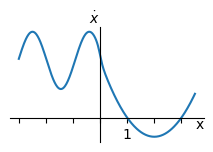

In [ ]:
# Graph for identifying stability

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

x_span = [-3,3.5]
x = np.linspace(x_span[0], x_span[1], 400)
def switch(x):
    return 0.5*(1+np.tanh(10*x))


plt.figure(figsize=(2.5,1.5))
plt.plot(x,(1.5*np.cos(3*x+1.2)+3)*(1-switch(x))+1*(x-1)*(x-3)*switch(x))

# Lots of axis formatting needed for this plot...
ax = plt.gca()

# Zero-centered axes; no frame
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# X ticks every 1; label only x=1
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: "1" if np.isclose(x, 1) else ""))

# No y ticks/labels
ax.set_yticks([])

# Axis-end labels placed on the zero-centered spines
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(xmax, 0, "x", ha="right", va="top", clip_on=False)
ax.text(0, ymax, r"$\dot{x}$", ha="right", va="bottom", clip_on=False)

velocityplot_path = "PC02_velocityplot-S26.png"
plt.savefig(velocityplot_path,dpi=300, bbox_inches='tight')


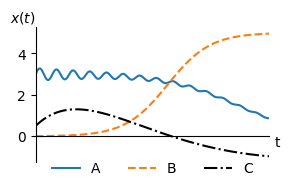

In [ ]:
# Graphs for checking understanding of single-valued dx/dt as a function of x

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Time grid (dense for the high-frequency sine term)
t0, t1 = 0.0, 2.2
t = np.linspace(t0, t1, 4000)

# ODEs
def f1(t, x):
    return x * (5 - x)

def f2(t, x):
    return -x * (3 - x)

# Solve IVPs with dense output
sol1 = solve_ivp(f1, (t0, t1), [0.01], dense_output=True, rtol=1e-9, atol=1e-12)
sol2 = solve_ivp(f2, (t0, t1), [2.99], dense_output=True, rtol=1e-9, atol=1e-12)

x1 = sol1.sol(t)[0]
x2 = sol2.sol(t)[0]

# Curves
A = 0.5 + 5 * t * (1 - t) * np.exp(-t)
B = x1
C = x2 + 0.3 * np.exp(-t) * np.sin(40 * t)

# Plot
plt.figure(figsize=(3, 2))
plt.plot(t, C, label="A")
plt.plot(t, B, linestyle="--", label="B")
plt.plot(t, A, 'k', linestyle="-.", label="C")

plt.xlim(t0, t1)
#plt.xlabel("t")

# Lots of axis formatting needed for this plot...
ax = plt.gca()

# Zero-centered axes; no frame
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# No x ticks/labels
ax.set_xticks([])

# Axis-end labels placed on the zero-centered spines
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(xmax+0.1, 0.05, "t", ha="right", va="top", clip_on=False)
ax.text(0, ymax+0.1, r"$x(t)$", ha="right", va="bottom", clip_on=False)

# Legend placed below
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 0.1), ncol=3, frameon=False)
plt.tight_layout()

singlevalued_path = "PC02_singlevalueddxdt-S26.png"
plt.savefig(singlevalued_path,dpi=300, bbox_inches='tight')

plt.show()
